# Import Required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from glob import glob
import os

# Set the working directory (change the path to your project folder)
os.chdir(r"C:\Users\USER\Documents\my_DS_projects\Vol_forecast_in_India")

# Verify the change
print("Current Working Directory:", os.getcwd())


Current Working Directory: C:\Users\USER\Documents\my_DS_projects\Vol_forecast_in_India


In [4]:
import importlib
import config
importlib.reload(config)

from config import settings
print("API Key Loaded:", settings.alpha_api_key[:5] + "*****")

API Key Loaded: 8051d*****


In [5]:
# Import settings
from config import settings

# Check Available Settings

In [6]:
# Display database name
settings.db_name

# Use `dir` to list attributes in `settings`
dir(settings)

['Config',
 '__abstractmethods__',
 '__annotations__',
 '__class__',
 '__class_vars__',
 '__config__',
 '__custom_root_type__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__exclude_fields__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_validators__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__include_fields__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__json_encoder__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__post_root_validators__',
 '__pre_root_validators__',
 '__pretty__',
 '__private_attributes__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__repr_args__',
 '__repr_name__',
 '__repr_str__',
 '__rich_repr__',
 '__schema_cache__',
 '__setattr__',
 '__setstate__',
 '__signature__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__try_update_forward_refs__',
 '__validators__',
 '_abc_impl',
 '_build_values',
 '_calculate_keys',
 '_copy_and_set_values',
 '_decompo

# Define API Request Parameters

In [7]:
ticker = 'AMBUJACEM.BSE'
output_size = 'compact'
data_type = 'json'

# Mask API Key (Show only first 4 characters, hide the rest)
masked_api_key = settings.alpha_api_key[:4] + "*" * (len(settings.alpha_api_key) - 4)

# Construct API Request URL

In [8]:
 url = ('https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?'
               'function=TIME_SERIES_DAILY&'
               f'symbol={ticker}&'
               f'outputsize={output_size}&'
               f'datatype=json&'
               f'apikey={settings.alpha_api_key}'

)

# Masked version of the URL for display
masked_url = url.replace(settings.alpha_api_key, masked_api_key)
print("Masked URL:", masked_url)

Masked URL: https://learn-api.wqu.edu/1/data-services/alpha-vantage/query?function=TIME_SERIES_DAILY&symbol=AMBUJACEM.BSE&outputsize = compact&datatype=json&apikey=8051************************************************************************************************************************************************************************************************************************************************************


# Send API Request & Check Response

In [9]:
response = requests.get(url=url)

# Check response type
print("Response type:", type(response))

# Use `dir` to explore response object
dir(response)

Response type: <class 'requests.models.Response'>


['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

# Extract API Response Code

In [10]:
response_code = response.status_code
print("Response Code:", response_code)

Response Code: 200


- Status code 200 means it is all OK. it worked! We successfully received data back from the AlphaVantage API.

# Extract and Preview API Response Data

In [11]:
response_text = response.text
print("Response Text Type:", type(response_text))
print(response_text[:200])  # Print first 200 characters for preview

Response Text Type: <class 'str'>
{
    "Meta Data": {
        "1. Information": "Daily Prices (open, high, low, close) and Volumes",
        "2. Symbol": "AMBUJACEM.BSE",
        "3. Last Refreshed": "2025-02-21",
        "4. Output 


# Convert API Response to JSON

In [12]:
response_data = response.json()
print("Response Data Type:", type(response_data))

# Print available keys in response data
response_data.keys()

Response Data Type: <class 'dict'>


dict_keys(['Meta Data', 'Time Series (Daily)'])

# Extract Stock Time Series Data

In [13]:
# Ensure 'Time Series (Daily)' exists in response
daily_key = "Time Series (Daily)"
if daily_key not in response_data:
    raise Exception("Invalid API response: 'Time Series (Daily)' not found")

stock_data = response_data[daily_key]
print("Stock Data Type:", type(stock_data))

Stock Data Type: <class 'dict'>


In [14]:
# Extract sample data for a specific date (ensure the date exists in the dataset)
sample_date = list(stock_data.keys())[0]
print(f"Sample Data for {sample_date}:", stock_data[sample_date])

Sample Data for 2025-02-21: {'1. open': '487.1000', '2. high': '487.1000', '3. low': '476.0000', '4. close': '481.7000', '5. volume': '886295'}


# Convert JSON Data to Pandas DataFrame

In [15]:
df_ambuja = pd.DataFrame.from_dict(stock_data, orient='index', dtype=float)
print("DataFrame Shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head(10)

DataFrame Shape: (100, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 2025-02-21 to 2024-09-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7+ KB
None


,1. open,2. high,3. low,4. close,5. volume
2025-02-21,487.10,487.10,476.00,481.70,886295.0
2025-02-20,481.50,484.70,477.85,482.80,165560.0
2025-02-19,479.95,490.05,474.55,479.85,62491.0
2025-02-18,491.45,493.80,474.35,486.45,168818.0
2025-02-17,485.05,490.90,479.50,488.80,29928.0
2025-02-14,502.85,506.65,483.65,489.45,40393.0
2025-02-13,509.95,510.25,499.60,502.60,27322.0
2025-02-12,500.05,505.85,481.15,501.00,49391.0
2025-02-11,506.80,512.20,493.60,499.70,49417.0
2025-02-10,518.85,519.25,504.40,506.55,43781.0


# Preprocess DataFrame

In [16]:
# Convert index to DateTime format
df_ambuja.index = pd.to_datetime(df_ambuja.index)
# Rename index
df_ambuja.index.name = 'date'
print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2025-02-21 to 2024-09-30
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   1. open    100 non-null    float64
 1   2. high    100 non-null    float64
 2   3. low     100 non-null    float64
 3   4. close   100 non-null    float64
 4   5. volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-02-21,487.10,487.10,476.00,481.70,886295.0
2025-02-20,481.50,484.70,477.85,482.80,165560.0
2025-02-19,479.95,490.05,474.55,479.85,62491.0
2025-02-18,491.45,493.80,474.35,486.45,168818.0
2025-02-17,485.05,490.90,479.50,488.80,29928.0


In [17]:
# Remove numbering from column names
df_ambuja.columns = [c.split('. ')[1] for c in df_ambuja.columns]
print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 2025-02-21 to 2024-09-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    100 non-null    float64
 1   high    100 non-null    float64
 2   low     100 non-null    float64
 3   close   100 non-null    float64
 4   volume  100 non-null    float64
dtypes: float64(5)
memory usage: 4.7 KB
None


,open,high,low,close,volume
date,,,,,
2025-02-21,487.10,487.10,476.00,481.70,886295.0
2025-02-20,481.50,484.70,477.85,482.80,165560.0
2025-02-19,479.95,490.05,474.55,479.85,62491.0
2025-02-18,491.45,493.80,474.35,486.45,168818.0
2025-02-17,485.05,490.90,479.50,488.80,29928.0


# Define Function to Fetch Stock Data from API

In [18]:

def get_daily(ticker, output_size='full'):
    """Get daily time series of an equity from AlphaVantage API.
    
    Parameters
    ----------
    ticker : str
        The ticker symbol of the equity.
    output_size : str, optional
        Number of observations to retrieve. "compact" returns the
        latest 100 observations. "full" returns all observations for
        the equity. Default is "full".

    Returns
    -------
    pd.DataFrame
        Columns are 'open', 'high', 'low', 'close', and 'volume'.
        All are numeric.
    """
    # Construct API URL
    url = ('https://www.alphavantage.co/query?'
           'function=TIME_SERIES_DAILY&'
           f'symbol={ticker}&'
           f'outputsize={output_size}&'
           'datatype=json&'
           f'apikey={settings.alpha_api_key}'
    )
    
    # Send request
    response = requests.get(url)
    response_data = response.json()
    
    # Validate response
    if 'Time Series (Daily)' not in response_data:
        raise Exception(f"Invalid API call. Check that ticker symbol '{ticker}' is correct")
    
    # Convert to DataFrame
    stock_data = response_data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(stock_data, orient='index', dtype=float)
    df.index = pd.to_datetime(df.index)
    df.index.name = 'date'
    df.columns = [c.split('. ')[1] for c in df.columns]
    
    return df

# Test Stock Data Retrieval Function

In [19]:
df_ambuja = get_daily(ticker="AMBUJACEM.BSE")
print(df_ambuja.info())
df_ambuja.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4962 entries, 2025-02-21 to 2005-01-03
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4962 non-null   float64
 1   high    4962 non-null   float64
 2   low     4962 non-null   float64
 3   close   4962 non-null   float64
 4   volume  4962 non-null   float64
dtypes: float64(5)
memory usage: 232.6 KB
None


,open,high,low,close,volume
date,,,,,
2025-02-21,487.10,487.10,476.00,481.70,886295.0
2025-02-20,481.50,484.70,477.85,482.80,165560.0
2025-02-19,479.95,490.05,474.55,479.85,62491.0
2025-02-18,491.45,493.80,474.35,486.45,168818.0
2025-02-17,485.05,490.90,479.50,488.80,29928.0


In [20]:
%load_ext autoreload
%load_ext sql
%autoreload 2

import sqlite3

In [21]:
# Import `AlphaVantageAPI`
from Data import AlphaVantageAPI

# Create instance of `AlphaVantageAPI` class
av = AlphaVantageAPI()

print("av type:", type(av))

av type: <class 'Data.AlphaVantageAPI'>


##  Create a get_daily method for your AlphaVantageAPI class in the Data Module

In [22]:
# Define Suzlon ticker symbol
ticker = "SUZLON.BSE"

# Use your `av` object to get daily data
df_suzlon = av.get_daily(ticker = ticker)

print("df_suzlon type:", type(df_suzlon))
print("df_suzlon shape:", df_suzlon.shape)
df_suzlon.head()

df_suzlon type: <class 'pandas.core.frame.DataFrame'>
df_suzlon shape: (4771, 5)


,open,high,low,close,volume
date,,,,,
2025-02-21,55.07,56.28,54.33,55.30,4923967.0
2025-02-20,54.06,55.30,53.07,54.85,5856520.0
2025-02-19,50.48,55.35,49.85,54.16,5843631.0
2025-02-18,51.10,51.30,49.50,50.63,3099106.0
2025-02-17,50.81,51.63,49.46,51.41,9089001.0


In [23]:
# Does `get_daily` return a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame), "Output must be DataFrame"

# Does DataFrame have 5 columns?
assert df_suzlon.shape[1] == 5

# Does DataFrame have a DatetimeIndex?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)

# Is the index name "date"?
assert df_suzlon.index.name == 'date'

In [24]:
# Does DataFrame have correct column names?
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume'] 

# Are columns correct data type?
assert all(df_suzlon.dtypes == float)

# SQL Repository Class
It wouldn't be efficient if our application needed to get data from the AlphaVantage API every time we wanted to explore our data or build a model, so we'll need to store our data in a database.

In [25]:
connection = sqlite3.connect(database = settings.db_name, check_same_thread = False)

print("connection type:", type(connection))

connection type: <class 'sqlite3.Connection'>


In [26]:
# Import class definition
from Data import SQLRepository

# Create instance of class
repo = SQLRepository(connection = connection)

# Does `repo` have a "connection" attribute?
assert hasattr(repo, 'connection')

# Is the "connection" attribute a SQLite `Connection`?
assert isinstance(repo.connection, sqlite3.Connection)

In [27]:
response = repo.insert_table(table_name=ticker, records=df_suzlon, if_exists="replace")

# Does your method return a dictionary?
assert isinstance(response, dict)

# Are the keys of that dictionary correct?
assert sorted(list(response.keys())) == ["records_inserted", "transaction_successful"]

In [28]:
%sql sqlite:////Users/USER/Documents/my_DS_projects/Vol_forecast_in_India/stocks.sqlite

Connecting to 'sqlite:////Users/USER/Documents/my_DS_projects/Vol_forecast_in_India/stocks.sqlite'

In [29]:
%sql SELECT * FROM 'SUZLON.BSE' LIMIT 5;

Running query in 'sqlite:////Users/USER/Documents/my_DS_projects/Vol_forecast_in_India/stocks.sqlite'

date,open,high,low,close,volume
2025-02-21 00:00:00,55.07,56.28,54.33,55.3,4923967.0
2025-02-20 00:00:00,54.06,55.3,53.07,54.85,5856520.0
2025-02-19 00:00:00,50.48,55.35,49.85,54.16,5843631.0
2025-02-18 00:00:00,51.1,51.3,49.5,50.63,3099106.0
2025-02-17 00:00:00,50.81,51.63,49.46,51.41,9089001.0


In [30]:
sql = "SELECT * FROM 'SUZLON.BSE'"

df_suzlon_test = pd.read_sql(
    sql = sql, con = connection, parse_dates= ['date'], index_col = 'date'
)

print("df_suzlon_test type:", type(df_suzlon_test))
print()
print(df_suzlon_test.info())
df_suzlon_test.head()

df_suzlon_test type: <class 'pandas.core.frame.DataFrame'>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4771 entries, 2025-02-21 to 2005-10-20
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    4771 non-null   float64
 1   high    4771 non-null   float64
 2   low     4771 non-null   float64
 3   close   4771 non-null   float64
 4   volume  4771 non-null   float64
dtypes: float64(5)
memory usage: 223.6 KB
None


,open,high,low,close,volume
date,,,,,
2025-02-21,55.07,56.28,54.33,55.30,4923967.0
2025-02-20,54.06,55.30,53.07,54.85,5856520.0
2025-02-19,50.48,55.35,49.85,54.16,5843631.0
2025-02-18,51.10,51.30,49.50,50.63,3099106.0
2025-02-17,50.81,51.63,49.46,51.41,9089001.0


In [31]:
# Assign `read_table` output to `df_suzlon`
df_suzlon = repo.read_table(table_name="SUZLON.BSE", limit=2500)  # noQA F821

# Is `df_suzlon` a DataFrame?
assert isinstance(df_suzlon, pd.DataFrame)

# Does it have a `DatetimeIndex`?
assert isinstance(df_suzlon.index, pd.DatetimeIndex)


# Is the index named "date"?
assert df_suzlon.index.name == 'date'

# Does it have 2,500 rows and 5 columns?
assert df_suzlon.shape == (2500, 5)

# Are the column names correct?
assert df_suzlon.columns.to_list() == ['open', 'high', 'low', 'close', 'volume']

# Are the column data types correct?
assert all(df_suzlon.dtypes == float)

# Print `df_suzlon` info
print("df_suzlon shape:", df_suzlon.shape)
print()
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2025-02-21 to 2015-01-14
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
dtypes: float64(5)
memory usage: 117.2 KB
None


,open,high,low,close,volume
date,,,,,
2025-02-21,55.07,56.28,54.33,55.30,4923967.0
2025-02-20,54.06,55.30,53.07,54.85,5856520.0
2025-02-19,50.48,55.35,49.85,54.16,5843631.0
2025-02-18,51.10,51.30,49.50,50.63,3099106.0
2025-02-17,50.81,51.63,49.46,51.41,9089001.0


In [32]:
ticker = "AMBUJACEM.BSE"

# Get Ambuja data using `av`
ambuja_records = av.get_daily(ticker = ticker)

# Insert `ambuja_records` database using `repo`
response = repo.insert_table(
    table_name=ticker, records = ambuja_records, if_exists = 'replace'
)

response

{'transaction_successful': True, 'records_inserted': 4962}

In [33]:
ticker = "AMBUJACEM.BSE"
df_ambuja = repo.read_table(table_name=ticker, limit = 2500)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-02-21,487.10,487.10,476.00,481.70,886295.0
2025-02-20,481.50,484.70,477.85,482.80,165560.0
2025-02-19,479.95,490.05,474.55,479.85,62491.0
2025-02-18,491.45,493.80,474.35,486.45,168818.0
2025-02-17,485.05,490.90,479.50,488.80,29928.0


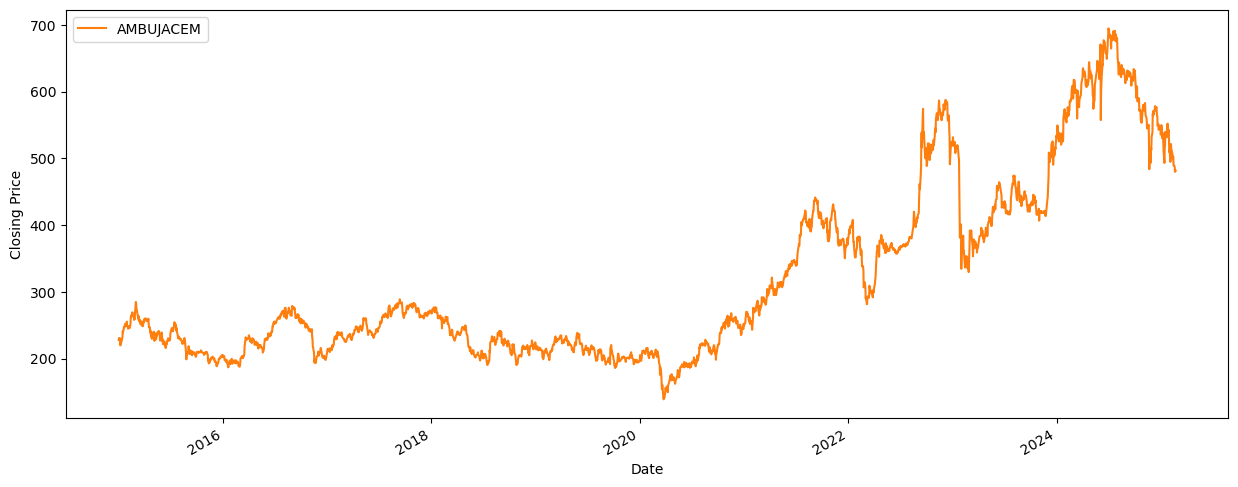

In [34]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_ambuja` closing price
df_ambuja['close'].plot(ax = ax, label = 'AMBUJACEM', color = 'C1')

# Label axes
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Add legend
plt.legend();

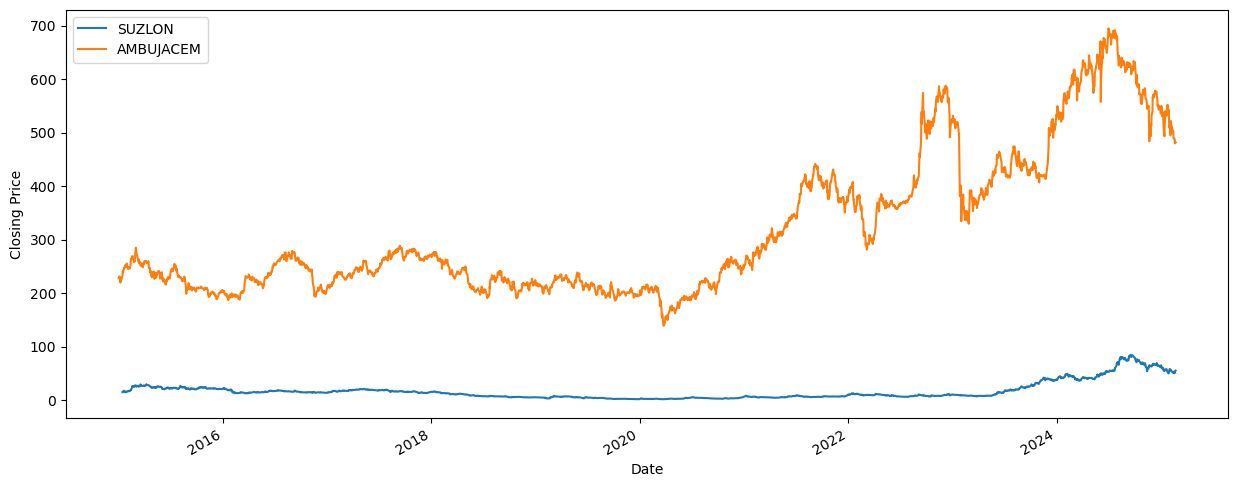

In [35]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_suzlon` and `df_ambuja`
df_suzlon['close'].plot(ax = ax, label = 'SUZLON')
df_ambuja['close'].plot(ax = ax, label = 'AMBUJACEM')


# Label axes
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Add legend
plt.legend();

In [36]:
# Sort DataFrame ascending by date
df_ambuja.sort_index(ascending = True, inplace = True)

# Create "return" column
df_ambuja['return'] = df_ambuja['close'].pct_change()*100

print("df_ambuja shape:", df_ambuja.shape)
print(df_ambuja.info())
df_ambuja.head()

df_ambuja shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-01-01 to 2025-02-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-01-01,229.40,229.40,227.15,227.85,30793.0,NaN
2015-01-02,229.00,231.65,228.70,230.95,46696.0,1.360544
2015-01-05,231.95,233.50,229.50,230.75,57956.0,-0.086599
2015-01-06,229.95,229.95,220.60,221.95,79166.0,-3.813651
2015-01-07,220.40,223.05,218.20,219.90,68421.0,-0.923631


In [37]:
# Sort DataFrame ascending by date
df_suzlon.sort_index(ascending = True, inplace = True)

# Create "return" column
df_suzlon['return'] = df_suzlon['close'].pct_change()* 100

print("df_suzlon shape:", df_suzlon.shape)
print(df_suzlon.info())
df_suzlon.head()

df_suzlon shape: (2500, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-01-14 to 2025-02-21
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    2500 non-null   float64
 1   high    2500 non-null   float64
 2   low     2500 non-null   float64
 3   close   2500 non-null   float64
 4   volume  2500 non-null   float64
 5   return  2499 non-null   float64
dtypes: float64(6)
memory usage: 136.7 KB
None


,open,high,low,close,volume,return
date,,,,,,
2015-01-14,15.21,15.30,14.50,14.97,7048835.0,NaN
2015-01-15,15.50,15.65,14.91,14.99,5944937.0,0.133601
2015-01-16,15.10,16.35,14.83,16.11,14177343.0,7.471648
2015-01-19,16.30,18.00,15.80,17.48,36283383.0,8.504035
2015-01-20,17.84,18.10,16.64,17.64,23010632.0,0.915332


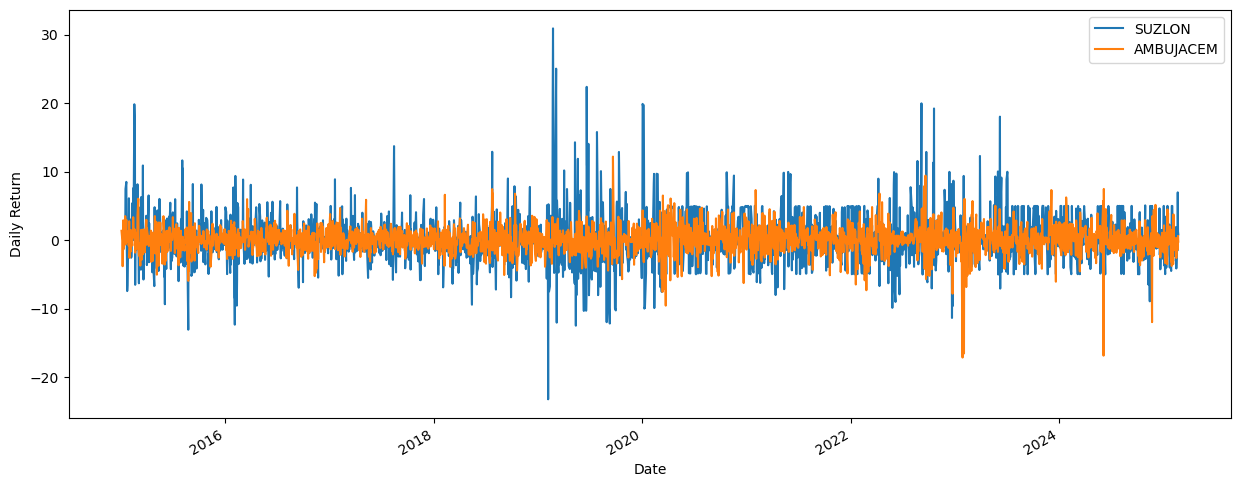

In [38]:
fig, ax = plt.subplots(figsize=(15, 6))
# Plot `df_suzlon` and `df_ambuja`
df_suzlon['return'].plot(ax = ax, label = 'SUZLON')
df_ambuja['return'].plot(ax = ax, label = 'AMBUJACEM')


# Label axes
plt.xlabel('Date')
plt.ylabel('Daily Return')

# Add legend
plt.legend();

# Predicting Volatility

In [39]:
import sqlite3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from arch import arch_model
from config import settings
from Data import SQLRepository

# Prepare Data

## Import 
- SQL Repo
- wrangle_data

In [40]:
connection = sqlite3.connect(settings.db_name, check_same_thread = False)
repo = SQLRepository(connection = connection)

print("repo type:", type(repo))
print("repo.connection type:", type(repo.connection))

repo type: <class 'Data.SQLRepository'>
repo.connection type: <class 'sqlite3.Connection'>


In [41]:
df_ambuja = repo.read_table(table_name= 'AMBUJACEM.BSE', limit = 2500)

print("df_ambuja type:", type(df_ambuja))
print("df_ambuja shape:", df_ambuja.shape)
df_ambuja.head()

df_ambuja type: <class 'pandas.core.frame.DataFrame'>
df_ambuja shape: (2500, 5)


,open,high,low,close,volume
date,,,,,
2025-02-21,487.10,487.10,476.00,481.70,886295.0
2025-02-20,481.50,484.70,477.85,482.80,165560.0
2025-02-19,479.95,490.05,474.55,479.85,62491.0
2025-02-18,491.45,493.80,474.35,486.45,168818.0
2025-02-17,485.05,490.90,479.50,488.80,29928.0


In [42]:
def wrangle_data(ticker, n_observations):

    # Get table from database
    df = repo.read_table(table_name=ticker, limit = n_observations + 1)

    # Sort DataFrame ascending by date
    df.sort_index(ascending =True, inplace = True)

    # Create "return" column
    df['return'] = df['close'].pct_change() * 100

    # Return returns
    return df['return'].dropna()

In [43]:
y_ambuja = wrangle_data(ticker="AMBUJACEM.BSE", n_observations=2500)

# Is `y_ambuja` a Series?
assert isinstance(y_ambuja, pd.Series)

# Are there 2500 observations in the Series?
assert len(y_ambuja) == 2500

# Is `y_ambuja` name "return"?
assert y_ambuja.name == "return"

# Does `y_ambuja` have a DatetimeIndex?
assert isinstance(y_ambuja.index, pd.DatetimeIndex)

# Is index sorted ascending?
assert all(y_ambuja.index == y_ambuja.sort_index(ascending=True).index)

# Are there no `NaN` values?
assert y_ambuja.isnull().sum() == 0

y_ambuja.head()

date
2015-01-01   -0.371666
2015-01-02    1.360544
2015-01-05   -0.086599
2015-01-06   -3.813651
2015-01-07   -0.923631
Name: return, dtype: float64

In [44]:
y_suzlon = wrangle_data(ticker = 'SUZLON.BSE', n_observations = 2500)

print("y_suzlon type:", type(y_suzlon))
print("y_suzlon shape:", y_suzlon.shape)
y_suzlon.head()

y_suzlon type: <class 'pandas.core.series.Series'>
y_suzlon shape: (2500,)


date
2015-01-14   -1.577909
2015-01-15    0.133601
2015-01-16    7.471648
2015-01-19    8.504035
2015-01-20    0.915332
Name: return, dtype: float64

## Explore
- Time Series and Non-Time Series plots
- Squared Returns
- ACF PACF

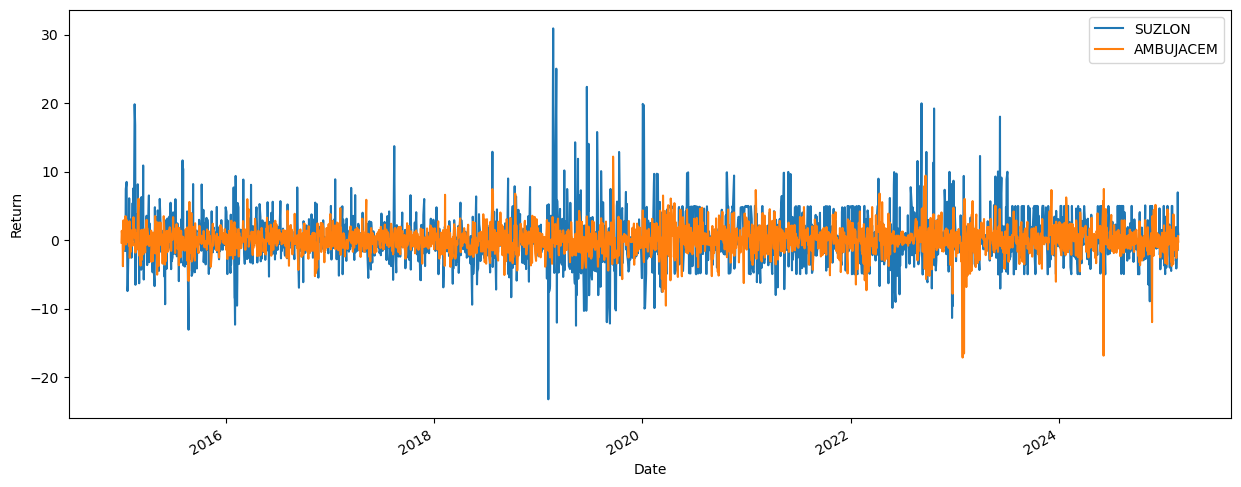

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for `df_suzlon` and `df_ambuja`
y_suzlon.plot(ax=ax, label="SUZLON")
y_ambuja.plot(ax=ax, label="AMBUJACEM")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend();

The returns with conditioned with time

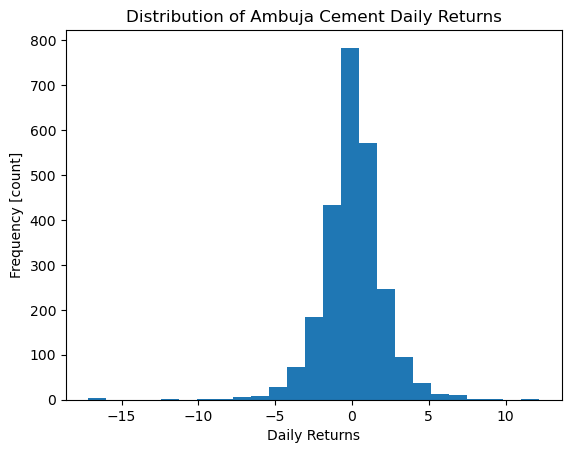

In [46]:
# Create histogram of `y_ambuja`, 25 bins
plt.hist(y_ambuja, bins = 25)

# Add axis labels
plt.xlabel('Daily Returns')
plt.ylabel('Frequency [count]')

# Add title
plt.title('Distribution of Ambuja Cement Daily Returns');

This is a familiar shape! It turns out that returns follow an almost normal distribution, centered on 0. Volatility is the measure of the spread of these returns around the mean. In other words, volatility in finance is the same thing at standard deviation in statistics.

### Cal the Daily Volatility

In [47]:
suzlon_daily_volatility = y_suzlon.std()
ambuja_daily_volatility = y_ambuja.std()

print("Suzlon Daily Volatility:", suzlon_daily_volatility)
print("Ambuja Daily Volatility:", ambuja_daily_volatility)

Suzlon Daily Volatility: 3.7564508068263347
Ambuja Daily Volatility: 1.998784974080822


Looks like Suzlon is more volatile than Ambuja. This reinforces what we saw in our time series plot, where Suzlon returns have a much wider spread.

In [48]:
suzlon_annual_volatility = suzlon_daily_volatility * np.sqrt(252)
ambuja_annual_volatility = ambuja_daily_volatility * np.sqrt(252)

print("Suzlon Annual Volatility:", suzlon_annual_volatility)
print("Ambuja Annual Volatility:", ambuja_annual_volatility)

Suzlon Annual Volatility: 59.631807882662486
Ambuja Annual Volatility: 31.72972779426323


Again, Suzlon has higher volatility than Ambuja. What do you think it means that the annual volatility is larger than daily?

In [49]:
ambuja_rolling_50d_volatility = y_ambuja.rolling(window = 50).std().dropna()

print("rolling_50d_volatility type:", type(ambuja_rolling_50d_volatility))
print("rolling_50d_volatility shape:", ambuja_rolling_50d_volatility.shape)
ambuja_rolling_50d_volatility.head()

rolling_50d_volatility type: <class 'pandas.core.series.Series'>
rolling_50d_volatility shape: (2451,)


date
2015-03-16    1.948897
2015-03-17    1.947374
2015-03-18    1.968485
2015-03-19    1.971454
2015-03-20    1.893914
Name: return, dtype: float64

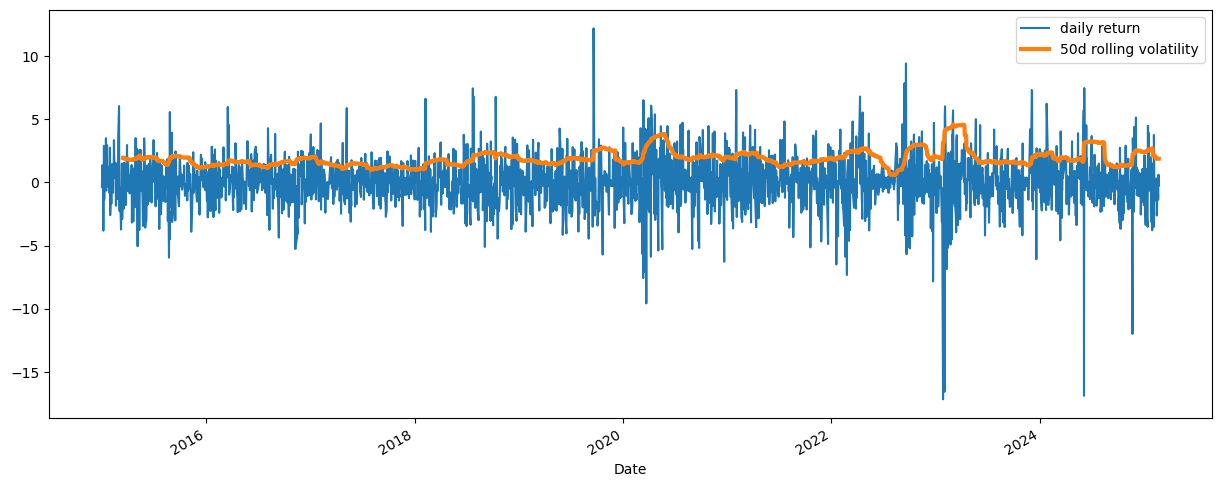

In [50]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja`
y_ambuja.plot(ax = ax, label = 'daily return')

# Plot `ambuja_rolling_50d_volatility`
ambuja_rolling_50d_volatility.plot(ax = ax, label = '50d rolling volatility', linewidth = 3)

# Add x-axis label
plt.xlabel('Date')

# Add legend
plt.legend();

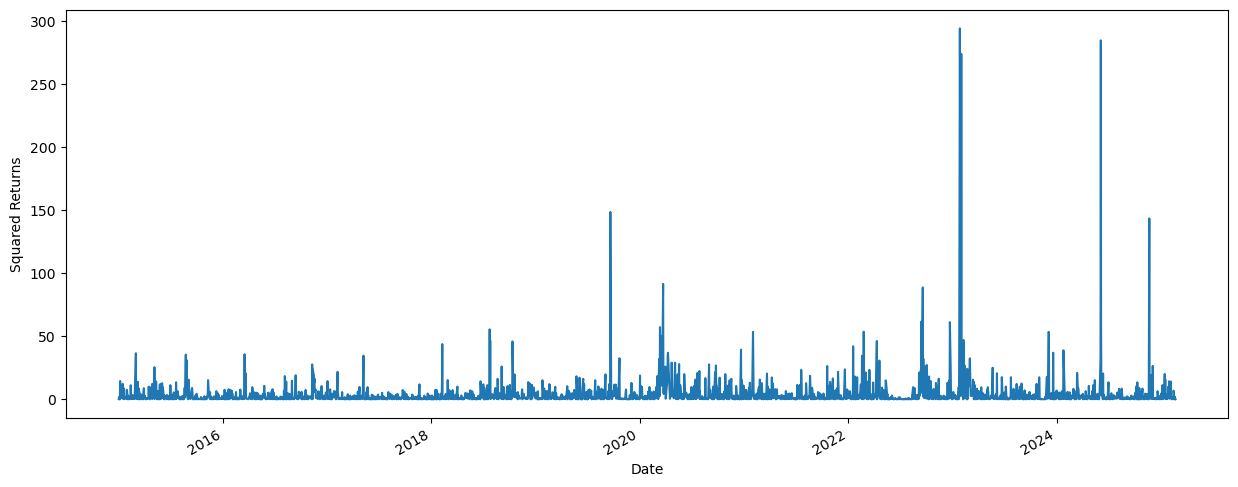

In [51]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot squared returns
(y_ambuja ** 2).plot(ax = ax)

# Add axis labels
plt.xlabel('Date')
plt.ylabel('Squared Returns');

Perfect! Now it's much easier to see that (1) we have periods of high and low volatility, and (2) high volatility days tend to cluster together. This is a perfect situation to use a GARCH model.

### Plot ACF

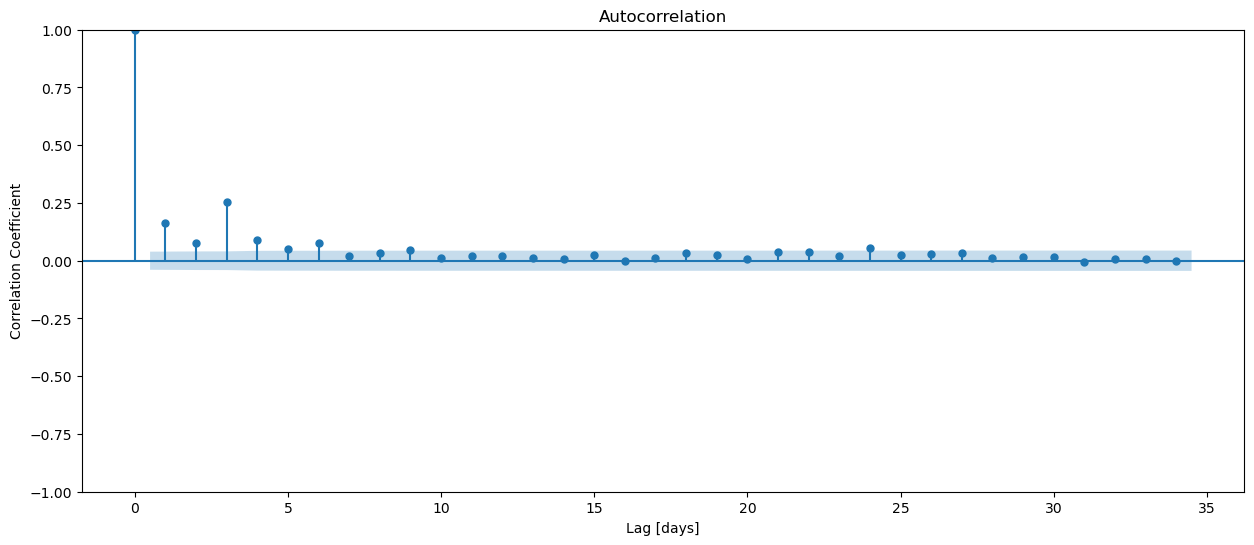

In [52]:

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared returns
plot_acf(y_ambuja **2 ,ax = ax)

# Add axis labels
plt.xlabel('Lag [days]')
plt.ylabel('Correlation Coefficient');

### Plot PACF

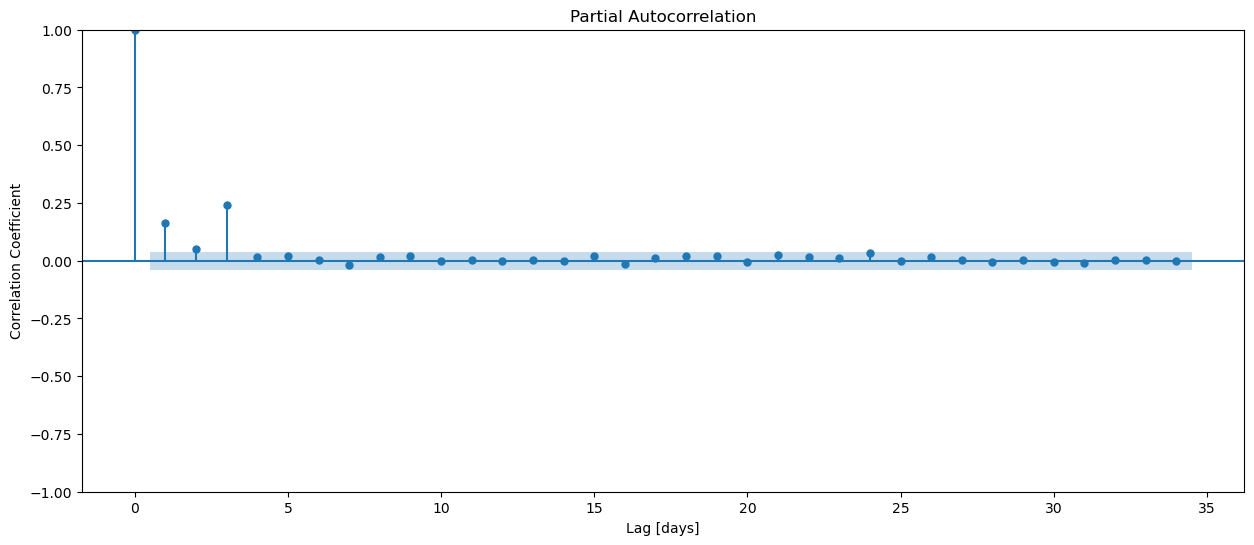

In [53]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create PACF of squared returns
plot_pacf(y_ambuja **2 ,ax = ax, method='ywm')

# Add axis labels
plt.xlabel('Lag [days]')
plt.ylabel('Correlation Coefficient');

In our PACF, it looks like a lag of 3 would be a good starting point.

## Split

In [54]:
cutoff_test = int(len(y_ambuja) * 0.8)
y_ambuja_train = y_ambuja.iloc[: cutoff_test]

print("y_ambuja_train type:", type(y_ambuja_train))
print("y_ambuja_train shape:", y_ambuja_train.shape)
y_ambuja_train.tail()

y_ambuja_train type: <class 'pandas.core.series.Series'>
y_ambuja_train shape: (2000,)


date
2023-02-03    6.029224
2023-02-06    1.538667
2023-02-07    1.120042
2023-02-08    0.169403
2023-02-09   -6.855730
Name: return, dtype: float64

# Build Model

## Iterate
- GARCH model
- Standardaized residuals

In [55]:
# Build and train model
model = arch_model(
    y_ambuja_train,
    p = 3,
    q = 3,
    rescale = False
).fit(disp = 0)
print("model type:", type(model))

# Show model summary
model.summary()

model type: <class 'arch.univariate.base.ARCHModelResult'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4046.99
Distribution:                  Normal   AIC:                           8109.98
Method:            Maximum Likelihood   BIC:                           8154.79
                                        No. Observations:                 2000
Date:                Sun, Feb 23 2025   Df Residuals:                     1999
Time:                        22:11:08   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0749  3.972e-02      1.886  5.934e-02 [-2.950e-03,  0.153]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5345      0.320      1.670  9.495e-02 [-9.287e-02,  1.162]
alpha[1]       0.1048  4.969e-02      2.109  3.496e-02  [7.398e-03,  0.202]
alpha[2]       0.0733  3.182e-02      2.303  2.126e-02  [1.092e-02,  0.136]
alpha[3]       0.1175  5.898e-02      1.993  4.627e-02  [1.945e-03,  0.233]
beta[1]        0.0000      0.340      0.000      1.000    [ -0.666,  0.666]
beta[2]        0.0000      0.236      0.000      1.000    [ -0.463,  0.463]
beta[3]        0.5765      0.363      1.589      0.112    [ -0.135,  1.288]
===========================================================================

Covariance estimator: robust
"""

p >t should be less than 0.05 so lets try p=1, q=1

In [56]:
# Build and train model
model = arch_model(
    y_ambuja_train,
    p = 1,
    q = 1,
    rescale = False
).fit(disp = 0)
print("model type:", type(model))

# Show model summary
model.summary()

model type: <class 'arch.univariate.base.ARCHModelResult'>


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4049.46
Distribution:                  Normal   AIC:                           8106.93
Method:            Maximum Likelihood   BIC:                           8129.33
                                        No. Observations:                 2000
Date:                Sun, Feb 23 2025   Df Residuals:                     1999
Time:                        22:11:08   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0727  3.860e-02      1.884  5.960e-02 [-2.943e-03,  0.148]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.2238      0.131      1.705  8.811e-02 [-3.340e-02,  0.481]
alpha[1]       0.1165  3.813e-02      3.054  2.259e-03  [4.171e-02,  0.191]
beta[1]        0.8293  6.424e-02     12.910  3.935e-38    [  0.703,  0.955]
===========================================================================

Covariance estimator: robust
"""

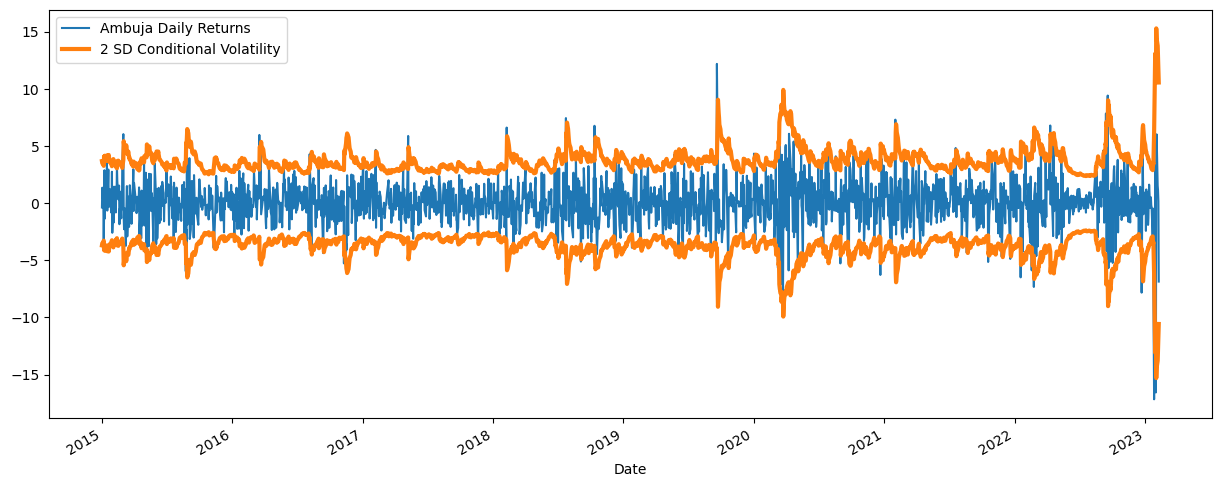

In [57]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot `y_ambuja_train`
y_ambuja_train.plot(ax = ax, label = 'Ambuja Daily Returns')

# Plot conditional volatility * 2
(2 * model.conditional_volatility).plot(
    ax  =ax, color = 'C1', label = '2 SD Conditional Volatility', linewidth = 3
)

# Plot conditional volatility * -2
(-2 * model.conditional_volatility).rename('').plot(
    ax  =ax, color = 'C1', linewidth = 3
)

# Add axis labels
plt.xlabel('Date')


# Add legend
plt.legend();

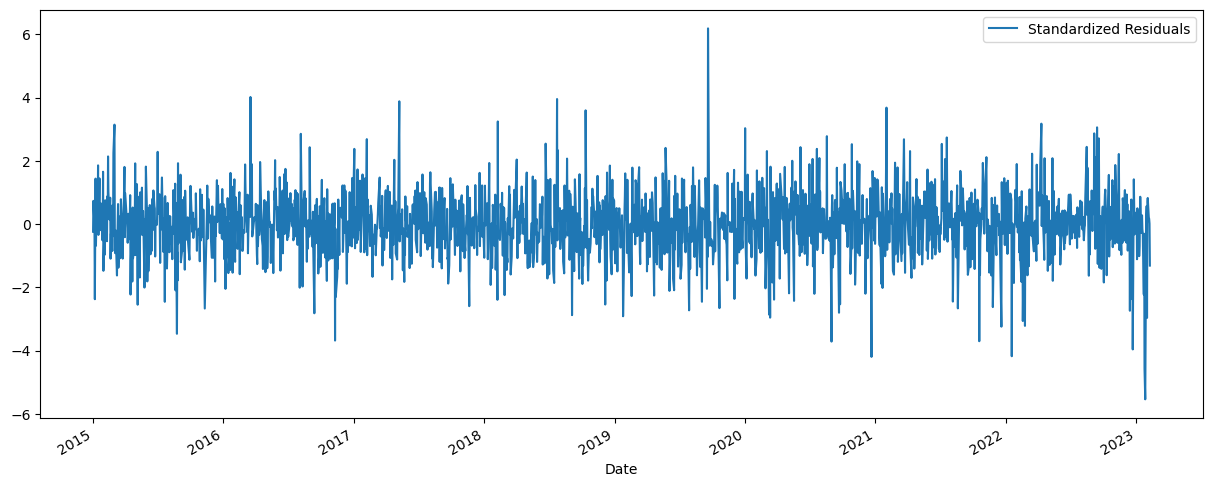

In [58]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot standardized residuals
model.std_resid.plot(ax = ax, label = 'Standardized Residuals')

# Add axis labels
plt.xlabel('Date')


# Add legend
plt.legend();

These residuals look good: they have a consistent mean and spread over time. Let's check their normality using a histogram.

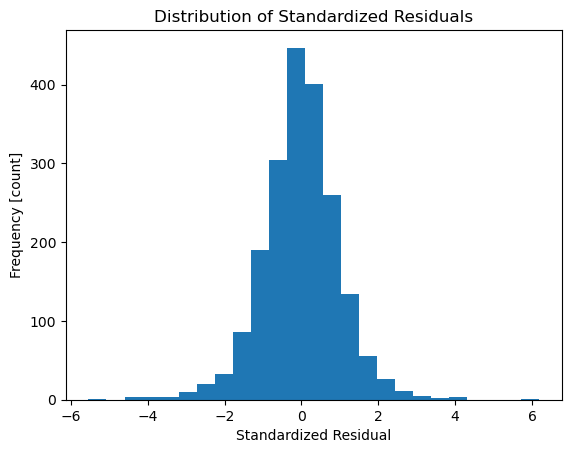

In [59]:
# Create histogram of standardized residuals, 25 bins
plt.hist(model.std_resid, bins = 25)

# Add axis labels
plt.xlabel('Standardized Residual')
plt.ylabel('Frequency [count]')

# Add title
plt.title('Distribution of Standardized Residuals');

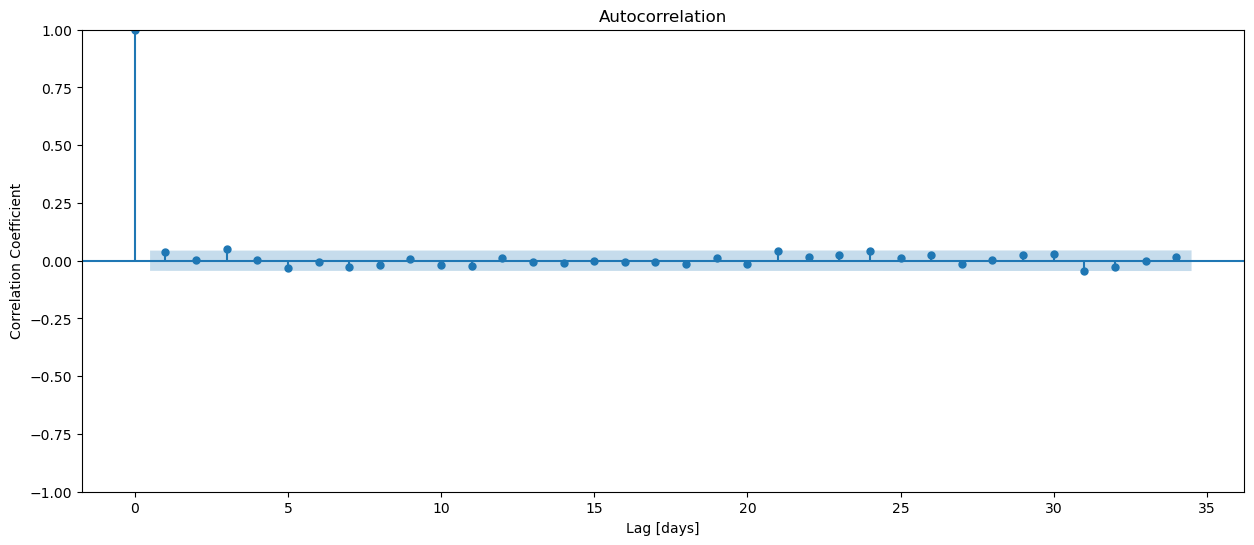

In [60]:
fig, ax = plt.subplots(figsize=(15, 6))

# Create ACF of squared, standardized residuals
plot_acf(model.std_resid **2, ax = ax)

# Add axis labels
plt.xlabel('Lag [days]')
plt.ylabel('Correlation Coefficient');

Because everything in the above visualization is within the blue band means that nothing is significant.
Excellent! Looks like this model is ready for a final evaluation.

In [61]:
one_day_forecast = model.forecast(horizon = 1, reindex = False).variance

print("one_day_forecast type:", type(one_day_forecast))
np.sqrt(one_day_forecast.iloc[0,0])

one_day_forecast type: <class 'pandas.core.frame.DataFrame'>


5.3826098415749675

There are two things we need to keep in mind here. First, our model forecast shows the predicted variance, not the standard deviation / volatility. So we'll need to take the square root of the value as we did in the code cell above. Second, the prediction is in the form of a DataFrame. It has a DatetimeIndex, and the date is the last day for which we have training data. The "h.1" column stands for "horizon 1", that is, our model's prediction for the following day. 

In [62]:
# Create empty list to hold predictions
predictions = []

# Calculate size of test data (20%)
test_size = int(len(y_ambuja) * 0.2)

# Walk forward
for i in range(test_size):
    # Create test data
    y_train = y_ambuja.iloc[: -(test_size - i)]

    # Train model
    model = arch_model(y_train, p = 1, q = 1, rescale = False).fit(disp = 0)

    # Generate next prediction (volatility, not variance)
    next_pred = model.forecast(horizon = 1, reindex = False).variance.iloc[0,0] ** 0.5

    # Append prediction to list
    predictions.append(next_pred)

# Create Series from predictions list
y_test_wfv = pd.Series(predictions, index=y_ambuja.tail(test_size).index)

print("y_test_wfv type:", type(y_test_wfv))
print("y_test_wfv shape:", y_test_wfv.shape)
y_test_wfv.head()

y_test_wfv type: <class 'pandas.core.series.Series'>
y_test_wfv shape: (500,)


date
2023-02-10    5.382610
2023-02-13    4.910665
2023-02-14    4.840069
2023-02-15    4.446919
2023-02-16    4.120730
dtype: float64

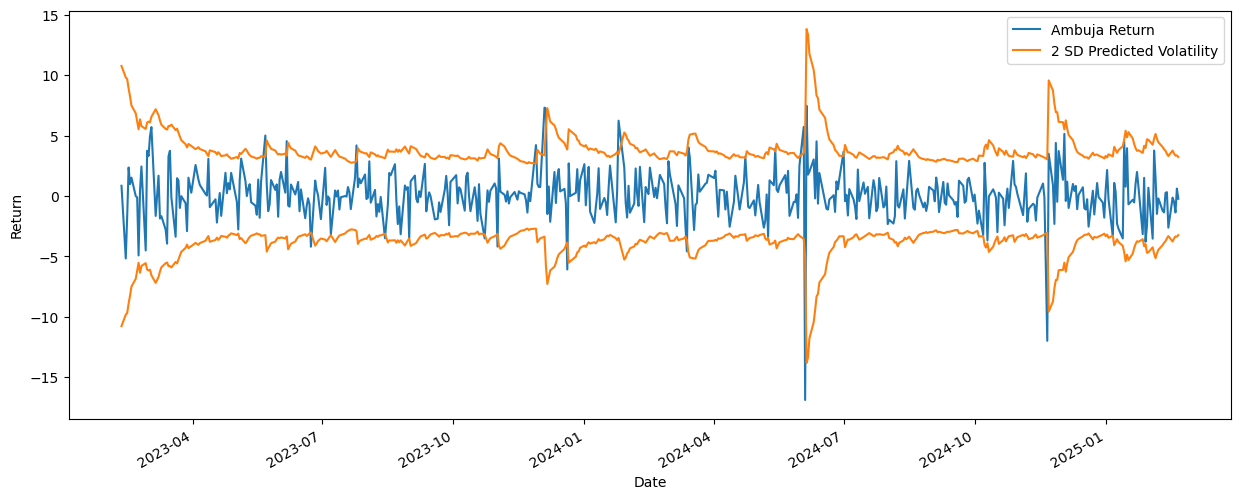

In [63]:
fig, ax = plt.subplots(figsize=(15, 6))

# Plot returns for test data
y_ambuja.tail(test_size).plot(ax=ax, label="Ambuja Return")

# Plot volatility predictions * 2
(2 * y_test_wfv).plot(ax=ax, c="C1", label="2 SD Predicted Volatility")

# Plot volatility predictions * -2
(-2 * y_test_wfv).plot(ax=ax, c="C1")

# Label axes
plt.xlabel("Date")
plt.ylabel("Return")

# Add legend
plt.legend();

This looks pretty good. Our volatility predictions seem to follow the changes in returns over time

# Communicate Results
- Converts Timestamps to ISO8601
- Create clean_prediction function

In [ ]:
# Generate 5-day volatility forecast
prediction = model.forecast(horizon=5, reindex=False).variance ** 0.5
print(prediction)

# Calculate forecast start date
start = prediction.index[0] + pd.DateOffset(days = 1)

# Create date range
prediction_dates = pd.bdate_range(start = start, periods = prediction.shape[1])

# Create prediction index labels, ISO 8601 format
prediction_index = [d.isoformat() for d in prediction_dates]

print("prediction_index type:", type(prediction_index))
print("prediction_index len:", len(prediction_index))
prediction_index[:3]

                 h.1       h.2      h.3       h.4       h.5
date                                                       
2025-02-20  1.616278  1.669432  1.71432  1.752424  1.784902
prediction_index type: <class 'list'>
prediction_index len: 5


['2025-02-21T00:00:00', '2025-02-24T00:00:00', '2025-02-25T00:00:00']

In [65]:
def clean_prediction(prediction):

    """Reformat model prediction to JSON.

    Parameters
    ----------
    prediction : pd.DataFrame
        Variance from a `ARCHModelForecast`

    Returns
    -------
    dict
        Forecast of volatility. Each key is date in ISO 8601 format.
        Each value is predicted volatility.
    """
    # Calculate forecast start date
    # Calculate forecast start date
    start = prediction.index[0] + pd.DateOffset(days = 1)

    # Create date range
    prediction_dates = pd.bdate_range(start = start, periods = prediction.shape[1])

    # Create prediction index labels, ISO 8601 format
    prediction_index = [d.isoformat() for d in prediction_dates]

    # Extract predictions from DataFrame, get square root
    data = prediction.values.flatten() ** 0.5

    # Combine `data` and `prediction_index` into Series
    prediction_formatted = pd.Series(data, index = prediction_index)

    # Return Series as dictionary
    return prediction_formatted.to_dict()

In [66]:
prediction = model.forecast(horizon=10, reindex=False).variance
prediction_formatted = clean_prediction(prediction)

# Is `prediction_formatted` a dictionary?
assert isinstance(prediction_formatted, dict)

# Are keys correct data type?
assert all(isinstance(k, str) for k in prediction_formatted.keys())

# Are values correct data type
assert all(isinstance(v, float) for v in prediction_formatted.values())

prediction_formatted

{'2025-02-21T00:00:00': 1.6162781881894657,
 '2025-02-24T00:00:00': 1.6694315060594955,
 '2025-02-25T00:00:00': 1.7143195615226976,
 '2025-02-26T00:00:00': 1.7524241340551676,
 '2025-02-27T00:00:00': 1.784902435067014,
 '2025-02-28T00:00:00': 1.8126757581899458,
 '2025-03-03T00:00:00': 1.8364887671280519,
 '2025-03-04T00:00:00': 1.8569506863351406,
 '2025-03-05T00:00:00': 1.874564837823308,
 '2025-03-06T00:00:00': 1.8897503912969666}

# Model Development

In [67]:
from arch.univariate.base import ARCHModelResult
import joblib

# Model Module

In [68]:
connection = sqlite3.connect(settings.db_name, check_same_thread = False)
repo = SQLRepository(connection = connection)

print("repo type:", type(repo))
print("repo.connection type:", type(repo.connection))

repo type: <class 'Data.SQLRepository'>
repo.connection type: <class 'sqlite3.Connection'>


In [69]:
from model import GarchModel

# Instantiate a `GarchModel`
gm_ambuja = GarchModel(ticker="AMBUJACEM.BSE", repo=repo, use_new_data=False)

# Does `gm_ambuja` have the correct attributes?
assert gm_ambuja.ticker == "AMBUJACEM.BSE"
assert gm_ambuja.repo == repo
assert not gm_ambuja.use_new_data
assert gm_ambuja.model_directory == settings.model_directory

### Turn the wrangle_data function we created earlier into a method for the GarchModel class inside the model.py module. When done, i will use the assert statements below to test the method by getting and wrangling data for the department store Shoppers Stop.


In [70]:
# Instantiate `GarchModel`, use new data
model_shop = GarchModel(ticker="SHOPERSTOP.BSE", repo=repo, use_new_data=True)

# Check that model doesn't have `data` attribute yet
assert not hasattr(model_shop, "data")

# Wrangle data
model_shop.wrangle_data(n_observations=1000)

# Does model now have `data` attribute?
assert hasattr(model_shop, "data")

# Is the `data` a Series?
assert isinstance(model_shop.data, pd.Series)

# Is Series correct shape?
assert model_shop.data.shape == (1000,)

model_shop.data.head()

date
2021-02-17    0.304735
2021-02-18   -0.677728
2021-02-19   -1.670588
2021-02-22   -2.823642
2021-02-23    0.418616
Name: return, dtype: float64

### Create a fit method for the GarchModel class. When i am done, i'll use the code below to test it.

In [71]:
# Instantiate `GarchModel`, use old data
model_shop = GarchModel(ticker="SHOPERSTOP.BSE", repo=repo, use_new_data=False)

# Wrangle data
model_shop.wrangle_data(n_observations=1000)

# Fit GARCH(1,1) model to data
model_shop.fit(p=1, q=1)

# Does `model_shop` have a `model` attribute now?
assert hasattr(model_shop, "model")

# Is model correct data type?
assert isinstance(model_shop.model, ARCHModelResult)

# Does model have correct parameters?
assert model_shop.model.params.index.tolist() == ["mu", "omega", "alpha[1]", "beta[1]"]

# Check model parameters
model_shop.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2320.19
Distribution:                  Normal   AIC:                           4648.38
Method:            Maximum Likelihood   BIC:                           4668.01
                                        No. Observations:                 1000
Date:                Sun, Feb 23 2025   Df Residuals:                      999
Time:                        22:11:58   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1010  7.670e-02      1.317      0.188 [-4.934e-02,  0.251]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0343  2.541e-02      1.351      0.177 [-1.548e-02,8.412e-02]
alpha[1]   8.3340e-03  3.922e-03      2.125  3.359e-02  [6.470e-04,1.602e-02]
beta[1]        0.9855  4.264e-03    231.131      0.000      [  0.977,  0.994]
=============================================================================

Covariance estimator: robust
"""

### Create a predict_volatility method for your GarchModel class. The method will need to return predictions as a dictionary, so i'll need to add your clean_prediction function as a helper method. When i'm done, test my work using the assert statements below.

In [72]:
# Generate prediction from `model_shop`
prediction = model_shop.predict_volatility(horizon=5)

# Is prediction a dictionary?
assert isinstance(prediction, dict)

# Are keys correct data type?
assert all(isinstance(k, str) for k in prediction.keys())

# Are values correct data type?
assert all(isinstance(v, float) for v in prediction.values())

prediction

{'2025-02-24T00:00:00': 2.3406825750896063,
 '2025-02-25T00:00:00': 2.3407924710883035,
 '2025-02-26T00:00:00': 2.340901683875414,
 '2025-02-27T00:00:00': 2.341010217730206,
 '2025-02-28T00:00:00': 2.341118076904746}

### Create a dump method for the GarchModel class. It should save the model assigned to the model attribute to the folder specified in the configuration settings

In [73]:
# Save `model_shop` model, assign filename
filename = model_shop.dump()

# Is `filename` a string?
assert isinstance(filename, str)

# Does filename include ticker symbol?
assert model_shop.ticker in filename

# Does file exist?
assert os.path.exists(filename)

filename

'models\\2025-02-23T22-11-59.395476_SHOPERSTOP.BSE.pkl'

###  Create a load function below that will take a ticker symbol as input and return a model

In [74]:
def load(ticker):

    """Load latest model from model directory.

    Parameters
    ----------
    ticker : str
        Ticker symbol for which model was trained.

    Returns
    -------
    `ARCHModelResult`
    """
    # Create pattern for glob search
    pattern = os.path.join(settings.model_directory, f'*{ticker}.pkl')

    # Try to find path of latest model
    try:
        model_path = sorted(glob(pattern))[-1]

    # Handle possible `IndexError`
    except IndexError:
        raise Exception(f'No model trained for""{ticker}".')

    # Load model
    model = joblib.load(model_path)

    # Return model
    return model

In [75]:
# Assign load output to `model`
model_shop = load(ticker="SHOPERSTOP.BSE")

# Does function return an `ARCHModelResult`
assert isinstance(model_shop, ARCHModelResult)

# Check model parameters
model_shop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2320.19
Distribution:                  Normal   AIC:                           4648.38
Method:            Maximum Likelihood   BIC:                           4668.01
                                        No. Observations:                 1000
Date:                Sun, Feb 23 2025   Df Residuals:                      999
Time:                        22:11:58   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1010  7.670e-02      1.317      0.188 [-4.934e-02,  0.251]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0343  2.541e-02      1.351      0.177 [-1.548e-02,8.412e-02]
alpha[1]   8.3340e-03  3.922e-03      2.125  3.359e-02  [6.470e-04,1.602e-02]
beta[1]        0.9855  4.264e-03    231.131      0.000      [  0.977,  0.994]
=============================================================================

Covariance estimator: robust
"""

### Transform the load function into a method for the GarchModel class. When i'm done, i'll test the method using the assert statements below.

In [76]:
model_shop = GarchModel(ticker="SHOPERSTOP.BSE", repo=repo, use_new_data=False)

# Check that new `model_shop_test` doesn't have model attached
assert not hasattr(model_shop, "model")

# Load model
model_shop.load()

# Does `model_shop_test` have model attached?
assert hasattr(model_shop, "model")

model_shop.model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -2320.19
Distribution:                  Normal   AIC:                           4648.38
Method:            Maximum Likelihood   BIC:                           4668.01
                                        No. Observations:                 1000
Date:                Sun, Feb 23 2025   Df Residuals:                      999
Time:                        22:11:58   Df Model:                            1
                                 Mean Model                                
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.1010  7.670e-02      1.317      0.188 [-4.934e-02,  0.251]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0343  2.541e-02      1.351      0.177 [-1.548e-02,8.412e-02]
alpha[1]   8.3340e-03  3.922e-03      2.125  3.359e-02  [6.470e-04,1.602e-02]
beta[1]        0.9855  4.264e-03    231.131      0.000      [  0.977,  0.994]
=============================================================================

Covariance estimator: robust
"""

# Main Module

## Application path

In [85]:
url = "http://localhost:8008"
response = requests.get(url = url)

print("response code:", response.status_code)
response.json()

response code: 200


{'message': 'Hello World!'}

## Data Classes

### Create a build_model function in your main module

In [89]:
from main import FitIn, FitOut

# Instantiate `FitIn`. Play with parameters.
fi = FitIn(
    ticker = 'SHOPERSTOP.BSE',
    use_new_data = True,
    n_observations = 2000,
    p= 1,
    q = 1
)
print(fi)

# Instantiate `FitOut`. Play with parameters.
fo = FitOut(
    ticker = 'SHOPERSTOP.BSE',
    use_new_data = True,
    n_observations = 2000,
    p = 1,
    q = 1,
    success = True,
    message = 'Model is ready to rock!!!'
)
print(fo)

ticker='SHOPERSTOP.BSE' use_new_data=True n_observations=2000 p=1 q=1
ticker='SHOPERSTOP.BSE' use_new_data=True n_observations=2000 p=1 q=1 success=True message='Model is ready to rock!!!'


In [91]:
# URL of `/fit` path
url = "http://localhost:8008/fit"

# Data to send to path
json = {
   'ticker': 'SHOPERSTOP.BSE',
    'use_new_data': False,
    'n_observations': 2000,
    'p':1,
    'q':1
}
# Response of post request
response = requests.post(url = url, json = json)
# Inspect response
print("response code:", response.status_code)
response.json()

response code: 200


{'ticker': 'SHOPERSTOP.BSE',
 'use_new_data': False,
 'n_observations': 2000,
 'p': 1,
 'q': 1,
 'success': True,
 'message': "Trained and saved 'models\\2025-02-24T00-34-29.300113_SHOPERSTOP.BSE.pkl'. "}

### Create definitions for a PredictIn and PredictOut data class. The PredictIn class should inherit from the pydantic BaseModel, and the PredictOut class should inherit from the PredictIn class

In [94]:
from main import PredictIn, PredictOut

pi = PredictIn(ticker="SHOPERSTOP.BSE", n_days=5)
print(pi)

po = PredictOut(
    ticker="SHOPERSTOP.BSE", n_days=5, success=True, forecast={}, message="success"
)
print(po)

ticker='SHOPERSTOP.BSE' n_days=5
ticker='SHOPERSTOP.BSE' n_days=5 success=True forecast={} message='success'


### Create a `post` request to hit the `"/predict"` path running at `"http://localhost:8008"`. I would get the 5-day volatility forecast for Shoppers Stop

In [95]:
# URL of `/predict` path
url = "http://localhost:8008/predict"
# Data to send to path
json = {'ticker': 'SHOPERSTOP.BSE', 'n_days':5}
# Response of post request
response = requests.post(url = url, json = json)
# Response JSON to be submitted to grader
submission = response.json()
# Inspect JSON
submission

{'ticker': 'SHOPERSTOP.BSE',
 'n_days': 5,
 'success': True,
 'forecast': {'2025-02-24T00:00:00': 2.349992360553185,
  '2025-02-25T00:00:00': 2.3587554233486077,
  '2025-02-26T00:00:00': 2.3672123120483515,
  '2025-02-27T00:00:00': 2.3753748658918603,
  '2025-02-28T00:00:00': 2.3832543816240683},
 'message': ''}